### 04 Manipulating image channels

- 행렬의 채널을 다루는 방법
- 채널의 개별적인 접근, 채널 간 맞교환, 대수 연산 수행을 다룬다

1. 모듈을 가져오고 이미지를 열어 형태를 확인

In [1]:
import cv2
import numpy as np

image = cv2.imread('../data/Lena.png').astype(np.float32) / 255
print('Shape: ', image.shape)

Shape:  (512, 512, 3)


2. 적색과 청색 채널을 서로 바꾸고 결과를 출력

In [2]:
image[:,:,[0,2]] = image[:,:,[2,0]]
cv2.imshow('blue_and_red_swapped', image)
cv2.waitKey()
cv2.destroyAllWindows()

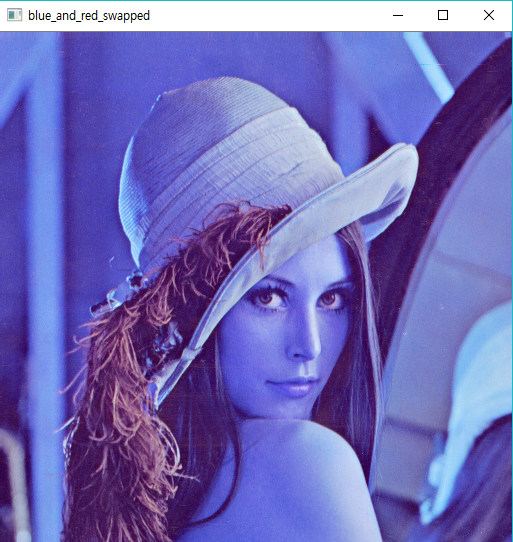

In [13]:
image[:,:,[0,2]] = image[:,:,[2,0]]
cv2.imshow('blue_and_red_swapped', image)
cv2.waitKey()
cv2.destroyAllWindows()

3. 원래대로 채널을 다시 바꾸고 이미지의 채색을 바꾸기 위해서 다양하게 스케일을 적용

In [28]:
image[:,:,[0,2]] = image[:,:,[2,0]]
image[:,:,0] = (image[:,:,0] * 0.9).clip(0,1)
image[:,:,1] = (image[:,:,1] * 1.1).clip(0,1)

cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()


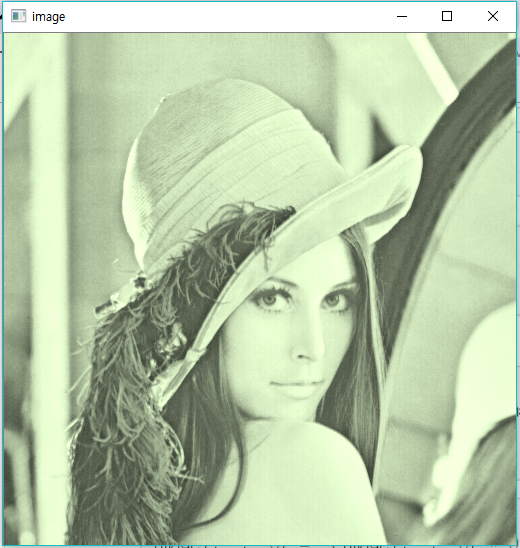

- 계속 실행시키니 이렇게 변함
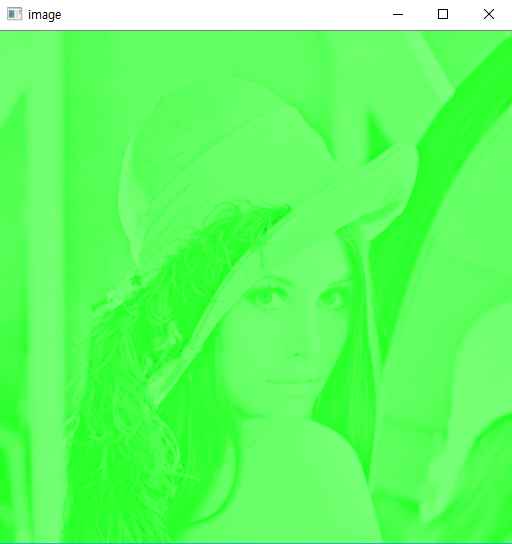

- 채널 간 맞교환을 위해서는 행렬에서 해당 슬라이스에 접근해야 한다
- 하지만 슬라이스는 원본 행렬의 사본이 아니라 동일한 데이터에 대한 다른 뷰일 뿐이다
- 즉, 일반적인 데이터 타입에서처럼 임시 변수를 통해 맞교환을 수행하는것이 불가능
- 이를 수행하기 위해선 더 복잡한 과정이 필요, Numpy를 사용해 단일 슬라이스뿐만 아니라
- 데이터의 새로운 뷰로 다양한 슬라이스를 얻을 수 있다.
- 이를 위해서는 원하는 차수에서 단일 인덱스 대신에 필요한 모든 슬라이스에 대한 여러 인덱스를 열거해야함
- 단일 인덱스를 사용하면 특정 채널에 접근할 수 있고, 해당 슬라이스에 대수 연산을 적용할 수 있다.

In [62]:
image[[0,1],[0,1],[0]]

array([0.42390227, 0.42390227], dtype=float32)